# 📘 Elastic Net Regression

## 📖 1. What Is Elastic Net?

**Elastic Net** combines the strengths of both **Ridge** and **Lasso** regression by using a mix of L1 and L2 penalties.  
It performs **variable selection** like Lasso and also handles **correlated predictors** like Ridge.

---

## 🧠 Objective Function

Elastic Net minimizes:

$$
\mathcal{L}(\boldsymbol{\beta}) = \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$

Or in sklearn's parameterization:

$$
\mathcal{L}(\boldsymbol{\beta}) = \text{RSS} + \alpha \left( \text{l1\_ratio} \cdot \|\beta\|_1 + (1 - \text{l1\_ratio}) \cdot \|\beta\|_2^2 \right)
$$

- $ \alpha $: overall strength
- $ \text{l1\_ratio} \in [0,1] $: balance between Lasso (1.0) and Ridge (0.0)

---

### ✅ When to Use Elastic Net?

- When features are **correlated**
- When Lasso alone is too aggressive (drops too many)
- When Ridge alone includes too many irrelevant features

---



## Simulated data

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style='whitegrid')

np.random.seed(0)
n, p = 100, 15
X = np.random.normal(0, 1, (n, p))
X[:, 1] = X[:, 0] + np.random.normal(0, 0.1, size=n)
beta = np.zeros(p)
beta[0] = 3
beta[1] = 3
y = X @ beta + np.random.normal(0, 1, size=n)

In [17]:
# Fit Elastic Net
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X, y)
y_pred = model.predict(X)
print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("Nonzero Coefs:", np.sum(model.coef_ != 0))

R^2: 0.9682115367945683
MSE: 0.8740967105042361
Nonzero Coefs: 12


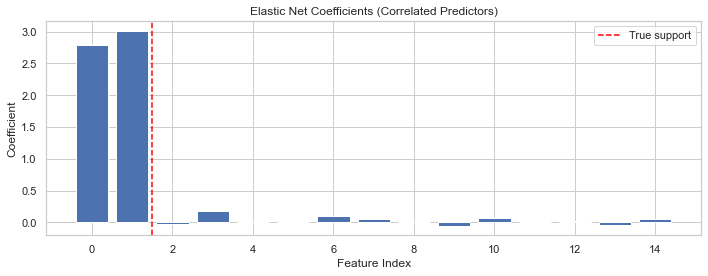

In [18]:
# Plot coefficients
plt.figure(figsize=(10, 4))
plt.bar(np.arange(p), model.coef_)
plt.axvline(1.5, color='red', linestyle='--', label='True support')
plt.title("Elastic Net Coefficients (Correlated Predictors)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()

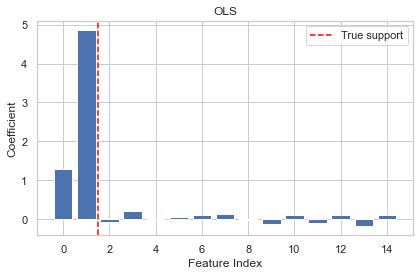

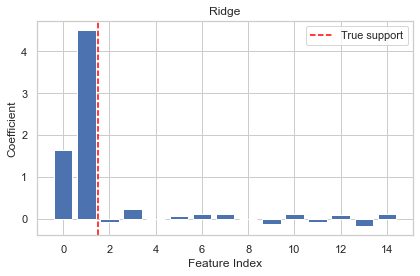

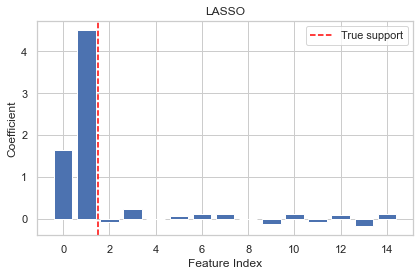

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Fit models
ols = LinearRegression().fit(X, y)
ridge = Ridge(alpha=0.1,solver='sparse_cg').fit(X, y)
lasso = Lasso(alpha=0.1).fit(X, y)

# Plot coefficients
plt.bar(np.arange(p), ols.coef_)
plt.axvline(1.5, color='red', linestyle='--', label='True support')
plt.title("OLS")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()

plt.bar(np.arange(p), ridge.coef_)
plt.axvline(1.5, color='red', linestyle='--', label='True support')
plt.title("Ridge")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()


plt.bar(np.arange(p), ridge.coef_)
plt.axvline(1.5, color='red', linestyle='--', label='True support')
plt.title("LASSO")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.legend()
plt.tight_layout()
plt.show()



## 🏠 Real Data Example: California Housing

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load housing data
data = fetch_california_housing()
X_real = pd.DataFrame(data.data, columns=data.feature_names)
y_real = data.target
X_train, X_test, y_train, y_test = train_test_split(X_real, y_real, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Fit Elastic Net on real data
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train_scaled, y_train)
y_pred_real = enet.predict(X_test_scaled)
print("R^2:", r2_score(y_test, y_pred_real))
print("MSE:", mean_squared_error(y_test, y_pred_real))
print("Nonzero Coefs:", np.sum(enet.coef_ != 0))
print("Coefficients:", enet.coef_)

R^2: 0.5259905808947872
MSE: 0.627217845259367
Nonzero Coefs: 4
Coefficients: [ 0.71040447  0.13524144 -0.          0.          0.         -0.
 -0.17638456 -0.13513132]


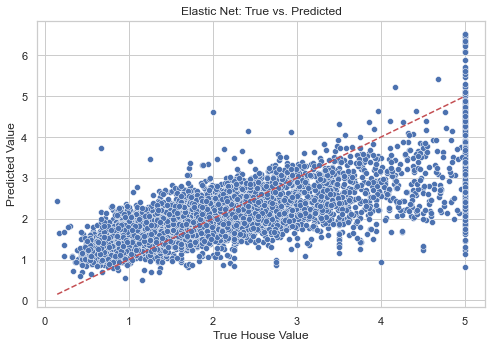

In [22]:
# Plot true vs predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True House Value")
plt.ylabel("Predicted Value")
plt.title("Elastic Net: True vs. Predicted")
plt.tight_layout()
plt.show()